In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

# Define column names based on your description
column_names = ['Episode Number', 'Step Number', 'Epsilon', 'Reward', 'Loss', 'Action Taken', 'Exploring or Exploitation']

# Load data, indicating no headers in the file and assigning column names
data = pd.read_csv('step_DDQN_lunar_main.csv', header=None, names=column_names)

# 1. Cumulative Reward by Episode
cumulative_rewards = data.groupby('Episode Number')['Reward'].sum()

# 2. Average Loss Per Episode
average_loss_per_episode = data.groupby('Episode Number')['Loss'].mean()

# 3. Epsilon Per Episode (last value per episode)
last_epsilon_per_episode = data.groupby('Episode Number')['Epsilon'].last()


# Determine the last reward of each episode to assess landings
last_reward_per_episode = data.groupby('Episode Number')['Reward'].last()

# Determine successful landings based on the reward threshold
successes = last_reward_per_episode >= 99

# Calculate success and failure counts for each segment of 500 episodes
success_counts = []
failure_counts = []
total_episodes = data['Episode Number'].nunique()  # Ensure covering all episodes dynamically

In [9]:

segment_size = 500
for start in range(1, total_episodes, 500):
    end = min(start + segment_size, total_episodes)
    #print(end)  # Ensure not to go beyond the total number of episodes
    segment_successes = successes[start:end]
    #print('Segment successes: ', segment_successes)
    success_count = segment_successes.sum()
    #print('Success_count:',success_count)
    failure_count = len(segment_successes) - success_count
    #print('failure count:', failure_count)
    success_counts.append(success_count)
    #print('Success Counts:', success_counts)
    failure_counts.append(failure_count)
    #print('Success Counts:', failure_counts)

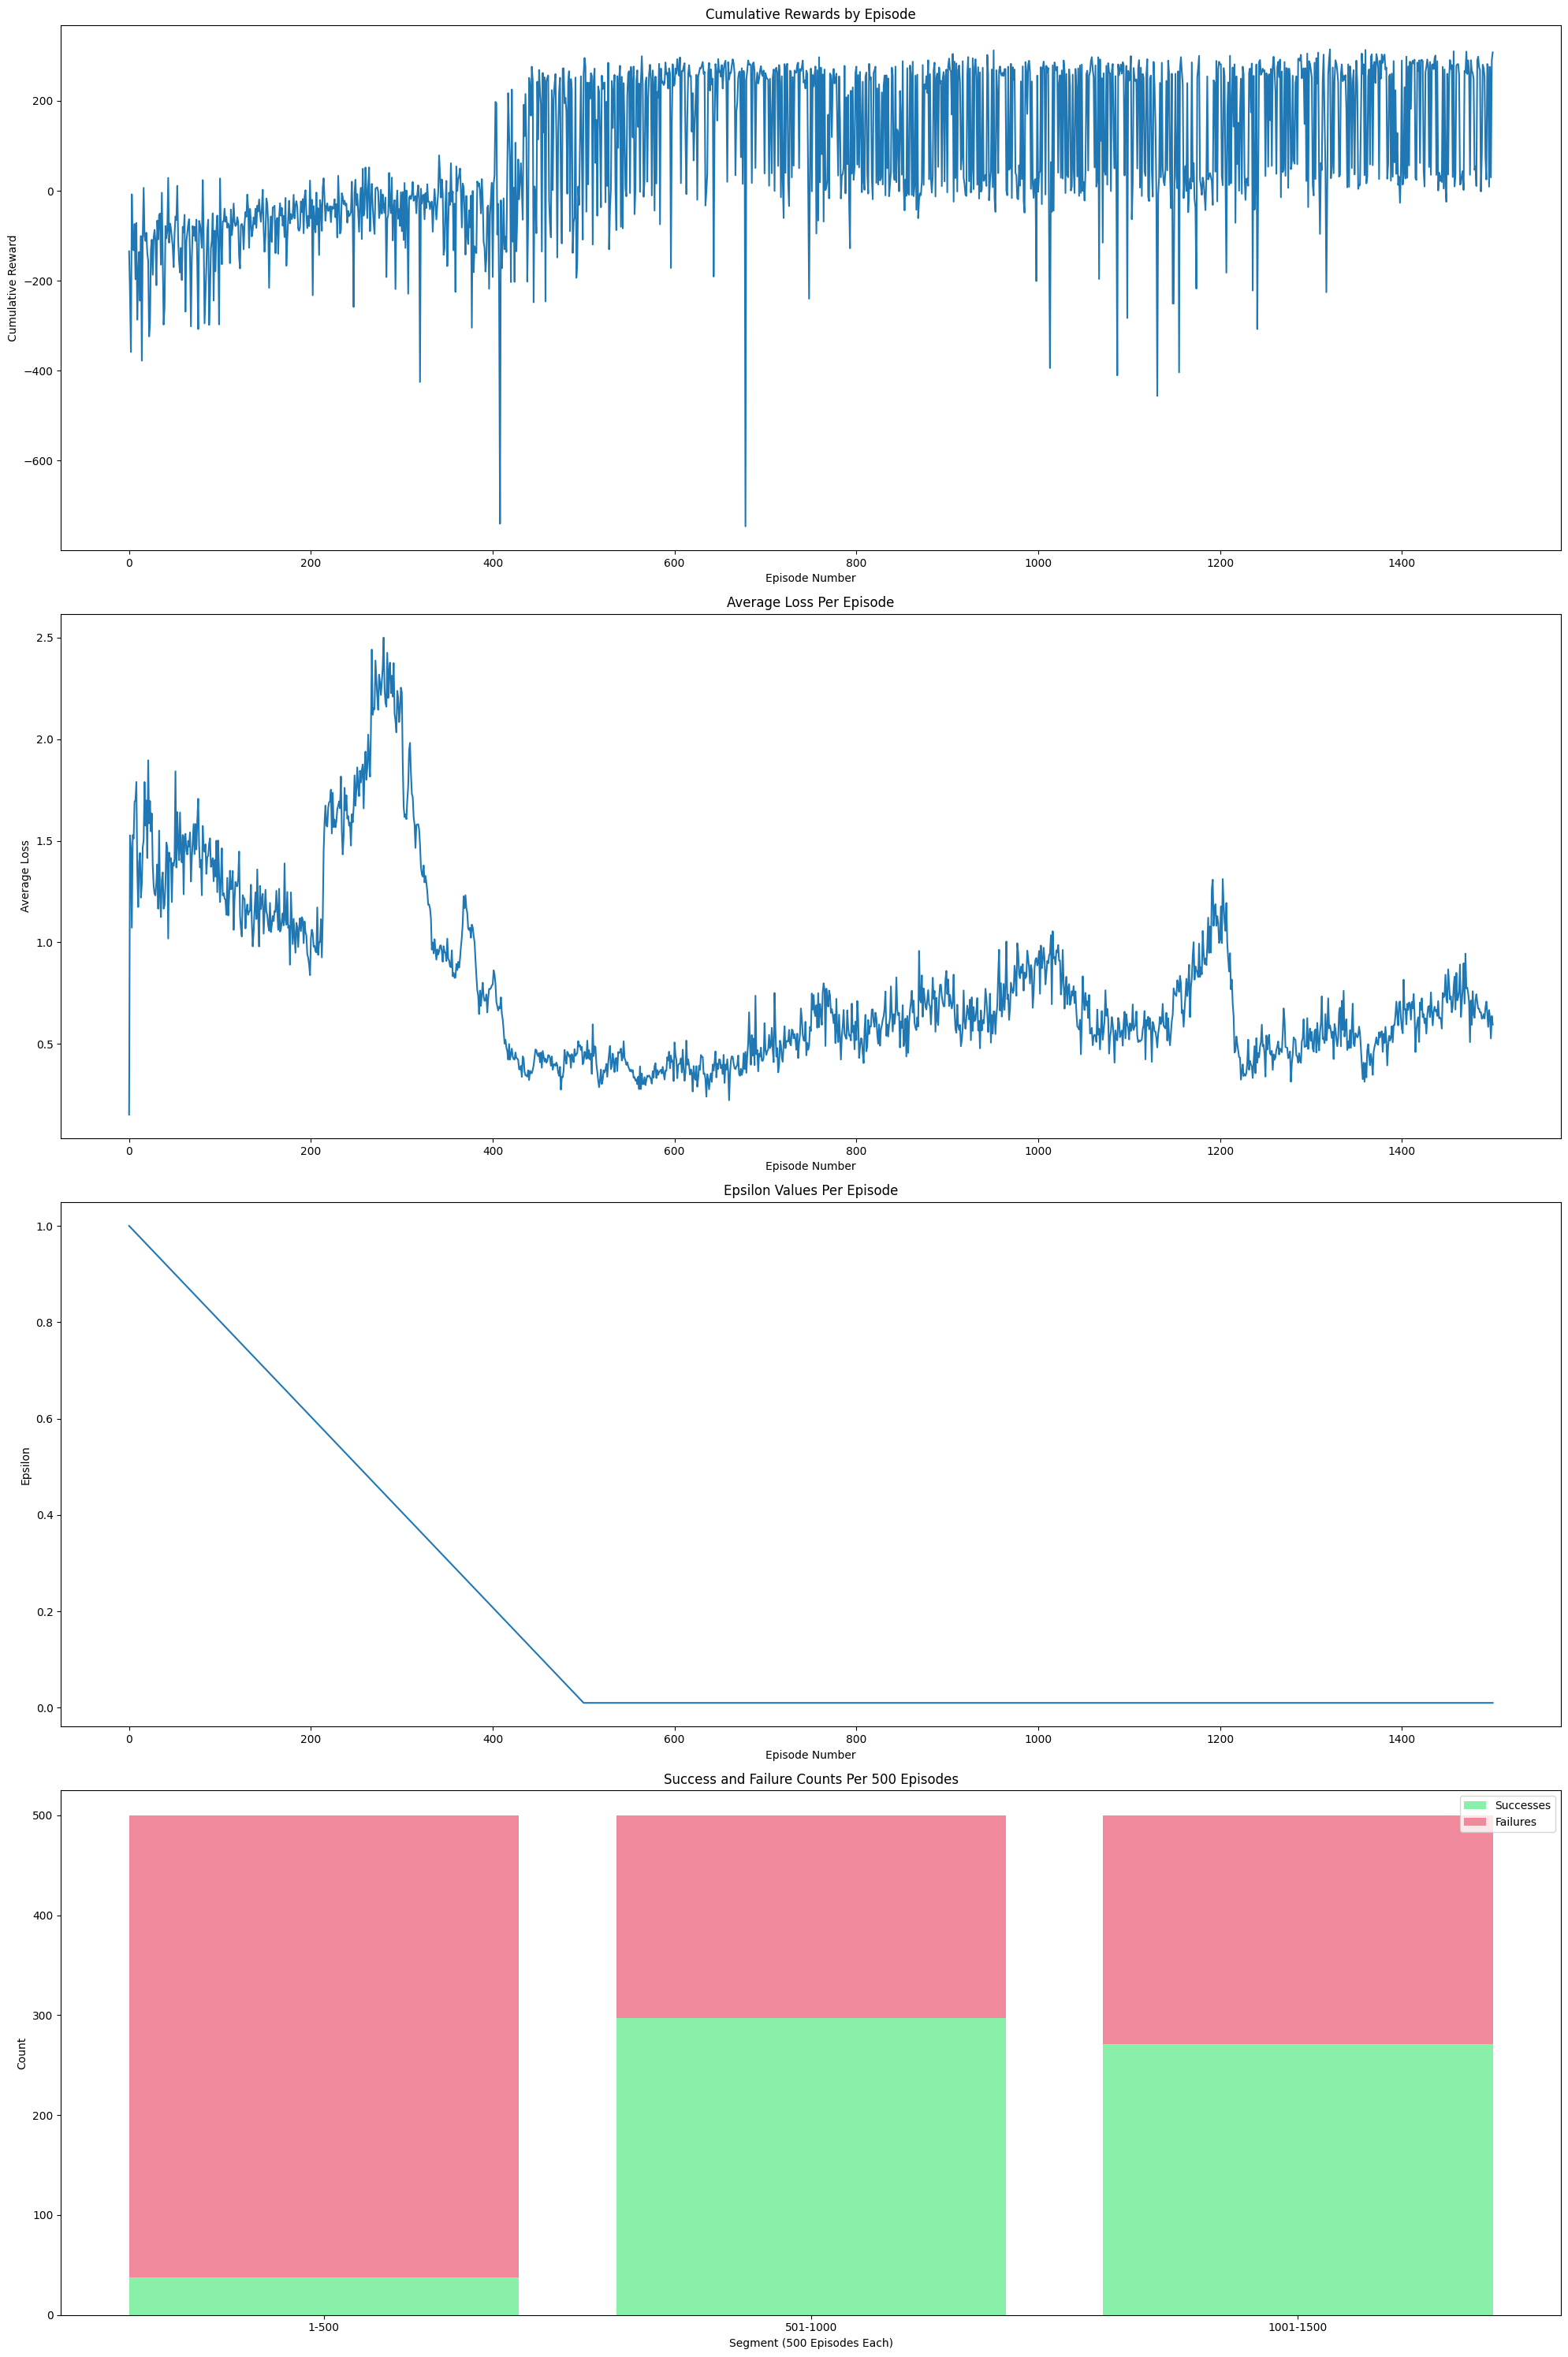

In [10]:



# Plotting
fig, ax = plt.subplots(4, 1, figsize=(20, 30))

# Plot cumulative rewards
ax[0].plot(cumulative_rewards)
ax[0].set_title('Cumulative Rewards by Episode')
ax[0].set_xlabel('Episode Number')
ax[0].set_ylabel('Cumulative Reward')

# Plot average loss per episode
ax[1].plot(average_loss_per_episode.index, average_loss_per_episode)
ax[1].set_title('Average Loss Per Episode')
ax[1].set_xlabel('Episode Number')
ax[1].set_ylabel('Average Loss')

# Plot epsilon values
ax[2].plot(last_epsilon_per_episode.index, last_epsilon_per_episode)
ax[2].set_title('Epsilon Values Per Episode')
ax[2].set_xlabel('Episode Number')
ax[2].set_ylabel('Epsilon')

# Plot success and failure counts per segment
segments = [f'{i*500+1}-{min((i+1)*500, total_episodes)}' for i in range(len(success_counts))]
ax[3].bar(segments, success_counts, color='#89F0AA', label='Successes')
ax[3].bar(segments, failure_counts, bottom=success_counts, color='#F0899C', label='Failures')
ax[3].set_title('Success and Failure Counts Per 500 Episodes')
ax[3].set_xlabel('Segment (500 Episodes Each)')
ax[3].set_ylabel('Count')
ax[3].legend()



plt.tight_layout()
plt.show()


In [12]:
data = pd.read_csv('DDQN_lunar_main.csv', header=None, names=['Episode Number','Reward','Epsilon','Avg. Loss'])
descriptive_stats = data[['Reward','Epsilon','Avg. Loss']].describe()

# Convert to HTML and add some styling
from IPython.display import display, HTML

# Apply styling
styled = descriptive_stats.T.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [
            ('background-color', '#f4f4f9'),
            ('color', 'black'),
            ('font-family', 'Arial'),
            ('border-style', 'solid'),
            ('border-width', '1px'),
            ('border-color', 'black')
        ]
    }, {
        'selector': 'td',
        'props': [
            ('font-family', 'Arial'),
            ('border-style', 'solid'),
            ('border-width', '1px'),
            ('border-color', 'black')
        ]
    }]
)

# Display the styled DataFrame in a Jupyter Notebook
display(styled)

,count,mean,std,min,25%,50%,75%,max
Reward,1501.000000,87.839899,163.057727,-746.403290,-28.436688,38.297467,259.667660,314.564349
Epsilon,1501.000000,0.175220,0.286201,0.010000,0.010000,0.010000,0.257500,1.000000
Avg. Loss,1501.000000,0.789666,0.432507,0.152499,0.482374,0.647316,0.965044,2.499423
